Initialise  
Mid price - classification rather than, 
Label - neural network (Random Forest)
mid-price

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot as plt

Import data

In [2]:
data = pd.read_csv('Individual data templates.csv')
print(data.head())

   TimeStamp Exchange_name       Bid         Ask  Mid-Price  Volume Data  \
0      0.000         Exch0        []          []        0.0            0   
1      0.279         Exch0  [[1, 6]]          []        0.0            6   
2      1.333         Exch0  [[1, 6]]  [[800, 1]]      400.5            7   
3      1.581         Exch0  [[1, 6]]  [[799, 1]]      400.0            7   
4      1.643         Exch0  [[1, 6]]  [[798, 1]]      399.5            7   

   Bid-Ask Spread  Ask Volume Data  Bid Volume Data  Order Imbalance  
0               0                0                0           0.0000  
1               0                0                6           1.0000  
2             799                1                6           0.7143  
3             798                1                6           0.7143  
4             797                1                6           0.7143  


In [3]:
# Ensure 'data' is your DataFrame variable
# Selecting the 'Mid-Price' column correctly
mid_price_subset = data['Bid-Ask Spread'].dropna()[:1000]

# Now, perform the ADF test on this numeric series
adf_test_result_subset = adfuller(mid_price_subset)

# Extract and print the test statistic and p-value
test_statistic_subset, p_value_subset = adf_test_result_subset[0], adf_test_result_subset[1]

print(p_value_subset)

8.669725898772057e-18


Plot ACF

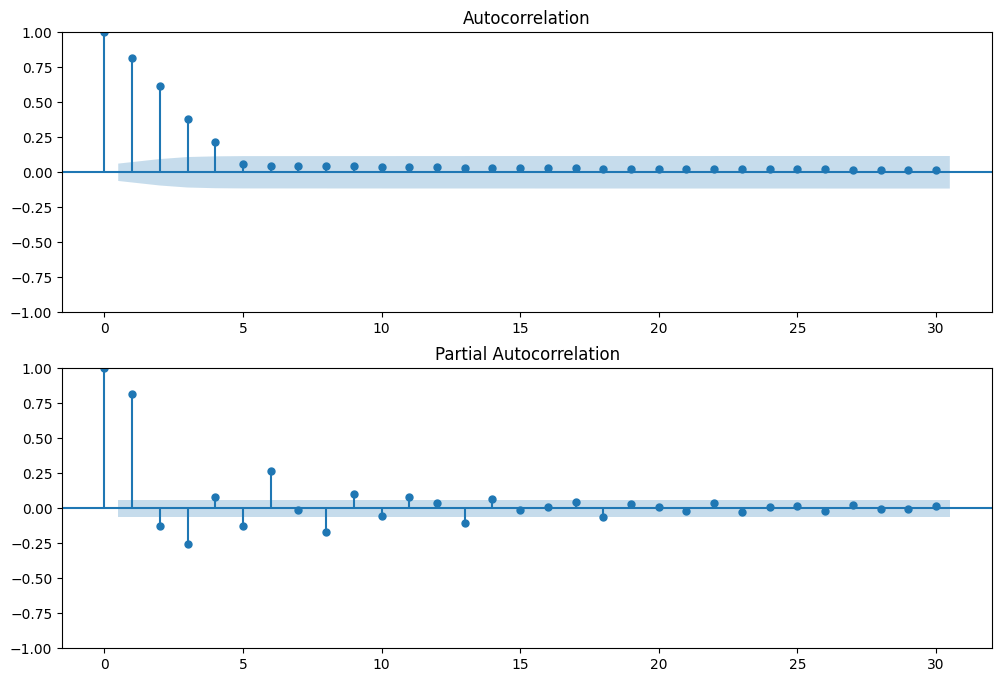

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'mid_price_subset' is your series
mid_price_subset = data['Bid-Ask Spread'].dropna()[:1000]

# ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(mid_price_subset, ax=ax[0])  # ACF plot
plot_pacf(mid_price_subset, ax=ax[1])  # PACF plot

plt.show()

Do ARIMA Test

In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(mid_price_subset, order=(1, 0, 1))  # Adjust p, d, q based on your analysis
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         Bid-Ask Spread   No. Observations:                 1000
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4777.975
Date:                Mon, 12 Feb 2024   AIC                           9563.950
Time:                        10:24:46   BIC                           9583.581
Sample:                             0   HQIC                          9571.411
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2512     19.350      0.478      0.633     -28.675      47.177
ar.L1          0.7821      0.010     81.817      0.000       0.763       0.801
ma.L1          0.0926      0.012      7.834      0.0

Forecast the next 5 values

trend test

In [6]:
# Forecast the next 5 values
forecast = model_fit.forecast(steps=5)

print(forecast)

1000    4.246572
1001    5.336938
1002    6.189744
1003    6.856748
1004    7.378430
Name: predicted_mean, dtype: float64
